<a href="https://colab.research.google.com/github/lawielas/ksitm-it/blob/master/ensemble_four_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [ ]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = data_generator.flow_from_directory(
    '/content/drive/MyDrive/DATASET/Training',
    target_size= (224, 224),
    batch_size= 100,
    class_mode='categorical'
)

Found 5722 images belonging to 4 classes.


In [ ]:
test_gen = data_generator.flow_from_directory(
    '/content/drive/MyDrive/DATASET/Testing',
    target_size= (224, 224),
    batch_size = 100,
    class_mode= 'categorical'
)

Found 1311 images belonging to 4 classes.


#EfficientNet

In [ ]:
from keras import applications
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, EfficientNetB4
from keras import callbacks
from keras.models import Sequential

In [ ]:
from keras.layers import Dense
from keras.optimizers import Adam

efficient_model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=4,
    input_shape=(224, 224, 3),
)

efficient_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

efficient_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)             

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor= 'loss',
    patience= 3
)

In [ ]:
efficient_history = efficient_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.4417 - loss: 1.8307 - precision: 0.4888 - recall: 0.3517 - val_accuracy: 0.2288 - val_loss: 1.7968 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 499ms/step - accuracy: 0.7237 - loss: 0.6925 - precision: 0.7681 - recall: 0.6719 - val_accuracy: 0.2288 - val_loss: 2.1786 - val_precision: 0.2288 - val_recall: 0.2288
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 500ms/step - accuracy: 0.8112 - loss: 0.4958 - precision: 0.8375 - recall: 0.7850 - val_accuracy: 0.2334 - val_loss: 2.5376 - val_precision: 0.2334 - val_recall: 0.2334
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.8848 - loss: 0.3038 - precision: 0.8993 - recall: 0.8726 - val_accuracy: 0.2288 - val_loss: 2.3188 - val_precision: 0.2288 - val_recall: 0.2288
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 504ms/step - accuracy: 0.9216 - loss: 0.2276 - precision: 0.9274 - recall: 0.9137 - val_accuracy: 0.228

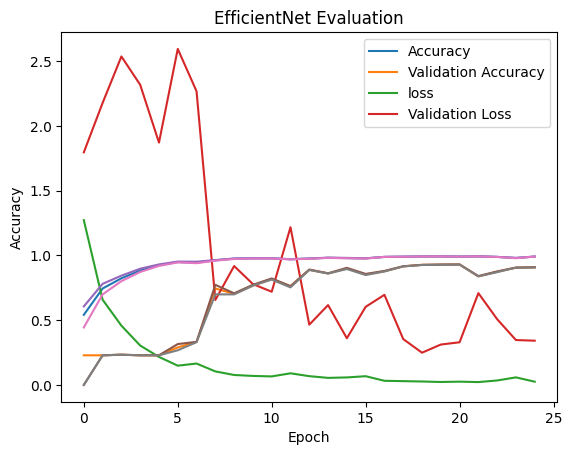

In [ ]:
import matplotlib.pyplot as plt
plt.plot(efficient_history.history["accuracy"])
plt.plot(efficient_history.history['val_accuracy'])
plt.plot(efficient_history.history['loss'])
plt.plot(efficient_history.history['val_loss'])
plt.plot(efficient_history.history['precision'])
plt.plot(efficient_history.history['val_precision'])
plt.plot(efficient_history.history['recall'])
plt.plot(efficient_history.history['val_recall'])
plt.title("EfficientNet Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
efficient_model.save('/content/drive/MyDrive/DATASET/new_models/efficient_model.h5')
efficient_model.save('/content/drive/MyDrive/DATASET/new_models/efficient_model.keras')

In [ ]:
print("The performance by EfficientNet model is")
efficient_Val=efficient_model.evaluate(test_gen)
print(efficient_Val)
print("Loss is ",str(efficient_Val[0]))
print("The accuracy is ",str(efficient_Val[1]))
# print("The Area Under Curve is ",str(efficient_Val[2]))
print("The Precision is ",str(efficient_Val[2]))
print("The Recall is ",str(efficient_Val[3]))

The performance by EfficientNet model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.9060 - loss: 0.3012 - precision: 0.9084 - recall: 0.9048
[0.3416741192340851, 0.9084668159484863, 0.9097169041633606, 0.906941294670105]
Loss is  0.3416741192340851
The accuracy is  0.9084668159484863
The Precision is  0.9097169041633606
The Recall is  0.906941294670105


#LeNet

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lenet_model = Sequential()
lenet_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224, 224, 3)))
lenet_model.add(MaxPool2D(strides=2))
lenet_model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
lenet_model.add(MaxPool2D(strides=2))
lenet_model.add(Flatten())
lenet_model.add(Dense(256, activation='relu'))
lenet_model.add(Dense(84, activation='relu'))
lenet_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
lenet_model.build()
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 48)        │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 139968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      35,832,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,894,872 (136.93 MB)

 Trainable params: 35,894,872 (136.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor= 'loss',
    patience= 3
)

In [ ]:
lenet_history = lenet_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 720ms/step - accuracy: 0.4757 - loss: 277.1479 - precision: 0.4855 - recall: 0.3573 - val_accuracy: 0.7132 - val_loss: 0.7739 - val_precision: 0.7826 - val_recall: 0.5629
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - accuracy: 0.8170 - loss: 0.4933 - precision: 0.8502 - recall: 0.7660 - val_accuracy: 0.8459 - val_loss: 0.4360 - val_precision: 0.8571 - val_recall: 0.8284
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.9435 - loss: 0.1731 - precision: 0.9480 - recall: 0.9350 - val_accuracy: 0.8894 - val_loss: 0.3402 - val_precision: 0.8963 - val_recall: 0.8833
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.9843 - loss: 0.0571 - precision: 0.9851 - recall: 0.9834 - val_accuracy: 0.9024 - val_loss: 0.3073 - val_precision: 0.9088 - val_recall: 0.8970
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 473ms/step - accuracy: 0.9926 - loss: 0.0277 - precision: 0.9926 - recall: 0.9925 - val_accuracy: 0.8993 - 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lenet_history.history["accuracy"])
plt.plot(lenet_history.history['val_accuracy'])
plt.plot(lenet_history.history['loss'])
plt.plot(lenet_history.history['val_loss'])
plt.plot(lenet_history.history['auc'])
plt.plot(lenet_history.history['val_auc'])
plt.plot(lenet_history.history['precision'])
plt.plot(lenet_history.history['val_precision'])
plt.plot(lenet_history.history['recall'])
plt.plot(lenet_history.history['val_recall'])
plt.title("LeNet Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
lenet_model.save('/content/drive/MyDrive/DATASET/new_models/lenet_model.h5')

In [ ]:
print("The performance by LeNet model is")
lenet_Val=lenet_model.evaluate(test_gen)
print(lenet_Val)
print("Loss is ",str(lenet_Val[0]))
print("The accuracy is ",str(lenet_Val[1]))
# print("The Area Under Curve is ",str(lenet_Val[2]))
print("The Precision is ",str(lenet_Val[2]))
print("The Recall is ",str(lenet_Val[3]))

#ViT

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
vit_model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=4, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
vit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])
vit_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 111, 111, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,580 (1.36 MB)

 Trainable params: 356,580 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor= 'loss',
    patience= 3
)

In [ ]:
vit_history = vit_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen))
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 8/58 ━━━━━━━━━━━━━━━━━━━━ 39:02 47s/step - accuracy: 0.2348 - loss: 1013.1141 - precision: 0.2600 - recall: 0.5313

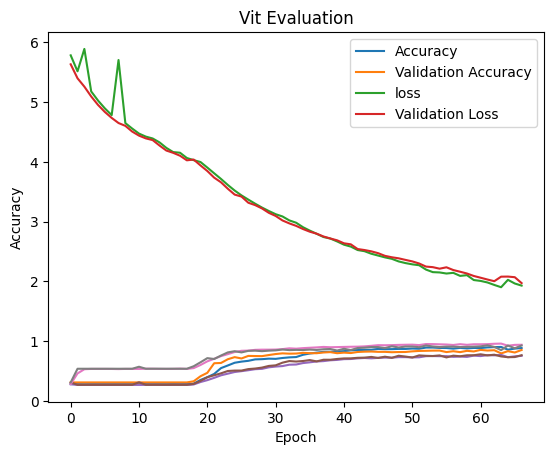

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vit_history.history["accuracy"])
plt.plot(vit_history.history['val_accuracy'])
plt.plot(vit_history.history['loss'])
plt.plot(vit_history.history['val_loss'])
plt.plot(vit_history.history['precision'])
plt.plot(vit_history.history['val_precision'])
plt.plot(vit_history.history['recall'])
plt.plot(vit_history.history['val_recall'])
plt.title("Vit Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
vit_model.save('/content/drive/MyDrive/DATASET/new_models/vit_model.keras')

In [ ]:
print("The performance by Vit model is")
vit_Val=vit_model.evaluate(test_gen)
print(vit_Val)
print("Loss is ",str(vit_Val[0]))
print("The accuracy is ",str(vit_Val[1]))
# print("The Area Under Curve is ",str(vit_Val[2]))
print("The Precision is ",str(vit_Val[2]))
print("The Recall is ",str(vit_Val[3]))

The performance by Vit model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8562 - loss: 1.9684 - precision: 0.7742 - recall: 0.9273
[1.9714655876159668, 0.852021336555481, 0.7646318674087524, 0.9267734289169312]
Loss is  1.9714655876159668
The accuracy is  0.852021336555481
The Precision is  0.7646318674087524
The Recall is  0.9267734289169312


#AltClip

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

import time
import os

In [ ]:
def get_model():
    alt_model = tf.keras.Sequential()
    alt_model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224, 224, 3)))
    alt_model.add(MaxPooling2D(pool_size=(2,2)))
    alt_model.add(BatchNormalization())

    alt_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    alt_model.add(MaxPooling2D(pool_size=(2,2)))
    alt_model.add(BatchNormalization())


    alt_model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    alt_model.add(MaxPooling2D(pool_size=(2,2)))
    alt_model.add(BatchNormalization())

    alt_model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    alt_model.add(MaxPooling2D(pool_size=(2,2)))
    alt_model.add(BatchNormalization())
    alt_model.add(Dropout(0.2)) ##

    alt_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    alt_model.add(MaxPooling2D(pool_size=(2,2)))
    alt_model.add(BatchNormalization())
    alt_model.add(Dropout(0.2))

    alt_model.add(Flatten())
    alt_model.add(Dense(256, activation='relu'))
    alt_model.add(Dropout(0.2))
    alt_model.add(Dense(128, activation='relu'))
    alt_model.add(Dropout(0.3)) ##
    alt_model.add(Dense(4, activation = 'softmax'))

    alt_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
      'accuracy',
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
    ])
    print('model prepared...')
    return alt_model

In [ ]:
alt_model = get_model()
alt_model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model prepared...


<Sequential name=sequential, built=True>

In [ ]:
alt_history = alt_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen))
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 2843s 44s/step - accuracy: 0.6518 - loss: 0.9113 - precision: 0.7037 - recall: 0.5955 - val_accuracy: 0.3089 - val_loss: 27.3991 - val_precision: 0.3089 - val_recall: 0.3089
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - accuracy: 0.8516 - loss: 0.3848 - precision: 0.8675 - recall: 0.8348 - val_accuracy: 0.3135 - val_loss: 4.5348 - val_precision: 0.3140 - val_recall: 0.3135
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 467ms/step - accuracy: 0.8877 - loss: 0.3097 - precision: 0.8937 - recall: 0.8756 - val_accuracy: 0.5202 - val_loss: 1.6878 - val_precision: 0.5426 - val_recall: 0.5103
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.9106 - loss: 0.2343 - precision: 0.9149 - recall: 0.9023 - val_accuracy: 0.7529 - val_loss: 0.8100 - val_precision: 0.7649 - val_recall: 0.7422
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 468ms/step - accuracy: 0.9215 - loss: 0.2129 - precision: 0.9275 - recall: 0.9143 - val_accuracy: 0.7979 - val_loss: 0.7

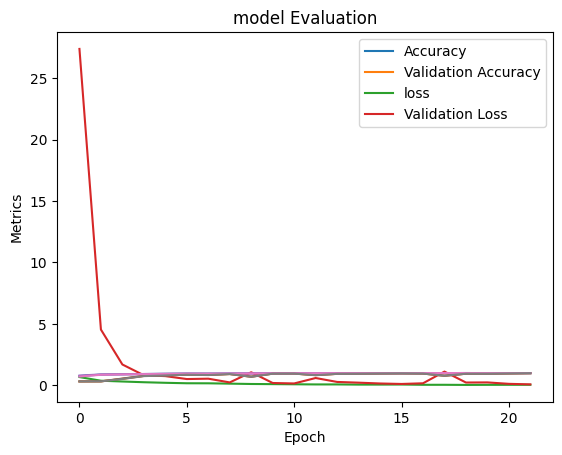

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alt_history.history["accuracy"])
plt.plot(alt_history.history['val_accuracy'])
plt.plot(alt_history.history['loss'])
plt.plot(alt_history.history['val_loss'])
plt.plot(alt_history.history['precision'])
plt.plot(alt_history.history['val_precision'])
plt.plot(alt_history.history['recall'])
plt.plot(alt_history.history['val_recall'])
plt.title("model Evaluation")
plt.ylabel("Metrics")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
alt_model.save('/content/drive/MyDrive/DATASET/new_models/alt_model.keras')
alt_model.save('/content/drive/MyDrive/DATASET/new_models/alt_model.h5')

#Ensemble

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model, load_model

efficent_model = load_model("/content/drive/MyDrive/DATASET/new_models/efficient_model.keras", compile=False)
lenet_model = load_model("/content/drive/MyDrive/DATASET/new_models/lenet_model.keras", compile=False)
vit_model = load_model("/content/drive/MyDrive/DATASET/new_models/vit_model.keras", compile=False)
alt_model = load_model("/content/drive/MyDrive/DATASET/new_models/alt_model.keras", compile=False)

ValueError: File not found: filepath=/content/drive/MyDrive/DATASET/new_models/efficient_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
from tensorflow.keras.models import Model, load_model

efficent_model_h5 = load_model("/content/drive/MyDrive/DATASET/new_models/efficient_model.h5", compile=False)
lenet_model_h5 = load_model("/content/drive/MyDrive/DATASET/new_models/lenet_model.h5", compile=False)
vit_model_h5 = load_model("/content/drive/MyDrive/DATASET/new_models/vit_model.h5", compile=False)
alt_model_h5 = load_model("/content/drive/MyDrive/DATASET/new_models/alt_model.h5", compile=False)

In [ ]:

from tensorflow.keras.layers import Input, Average
efficent_model = Model(inputs=efficent_model_h5.inputs,
                outputs=efficent_model.outputs,
                name='efficent_model')
lenet_model = Model(inputs=lenet_model_h5.inputs,
                outputs=lenet_model.outputs,
                name='lenet_model')
vit_model = Model(inputs=vit_model_h5.inputs,
                outputs=vit_model.outputs,
                name='vit_model')
alt_model = Model(inputs=alt_model_h5.inputs,
                outputs=alt_model.outputs,
                name='alt_model')
models = [efficent_model, lenet_model, vit_model, alt_model]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ValueError: The name "input_layer_2" is used 2 times in the model. All operation names should be unique.